In [1]:
import sklearn as sk
import sklearn.model_selection as skm
import sklearn.ensemble as ske
import pandas as pd
import openpyxl
import graphviz 
import numpy as np

In [2]:
data = pd.read_excel('data.xlsx', engine='openpyxl')
training_data = data.sample(frac=0.6, random_state=25)
test_data = data.drop(training_data.index)

In [3]:
Y = data['diagnosis']
X = data.loc[:, data.columns != 'diagnosis']
Y_names = list(set(Y))

In [4]:
Y_training = training_data['diagnosis']
X_training = training_data.loc[:, training_data.columns != 'diagnosis']
X_test = test_data.loc[:, training_data.columns != 'diagnosis']
Y_test = test_data['diagnosis']
Ytr_names = list(set(Y_training))

# Decision tree

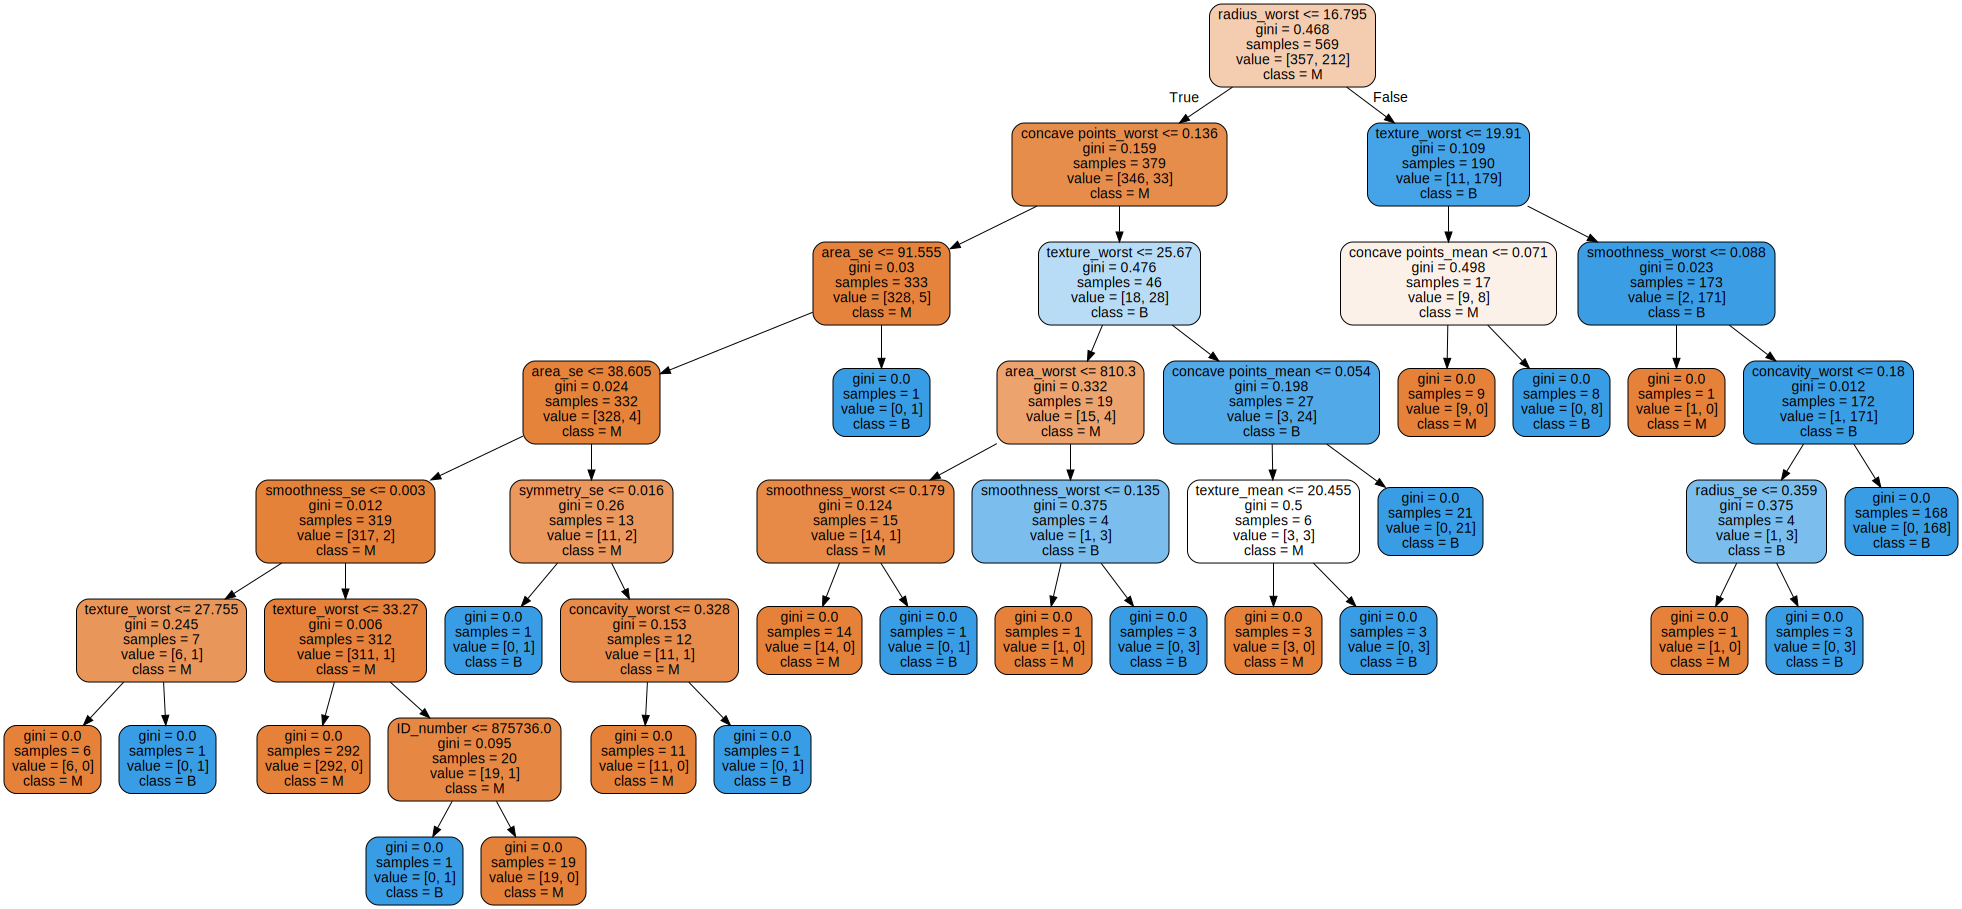

In [7]:
tree_1 = sk.tree.DecisionTreeClassifier(random_state=25)
tree_fitted = tree_1.fit(X, Y)
dot_data = sk.tree.export_graphviz(tree_fitted, out_file=None, feature_names=X.columns, class_names=Y_names, filled=True, rounded=True) 
graph = graphviz.Source(dot_data) 
graph

In [6]:
path = tree_fitted.cost_complexity_pruning_path(X, Y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

mean_cv_score = []
for alpha in ccp_alphas:
    ctree = sk.tree.DecisionTreeClassifier(random_state=25,ccp_alpha=alpha)
    scores = skm.cross_val_score(ctree, X, Y, cv=6)
    mean_cv_score.append([np.mean(scores),alpha]) 
alpha_best = mean_cv_score[np.argmax(mean_cv_score, axis=0)[0]][1]

In [7]:
ccp_alphas

array([0.        , 0.00174645, 0.00174725, 0.00230152, 0.0026362 ,
       0.00328061, 0.00342045, 0.0034541 , 0.00468658, 0.00518299,
       0.01473863, 0.01803852, 0.05007101, 0.32521088])

In [7]:
pruned_tree = sk.tree.DecisionTreeClassifier(random_state=25,ccp_alpha=alpha_best)
pruned_tree_scores = skm.cross_val_score(pruned_tree, X, Y, cv=6)
pruned_tree_fitted = pruned_tree.fit(X_training, Y_training)
pruned_graph = sk.tree.export_graphviz(pruned_tree_fitted, out_file=None, feature_names=X.columns, class_names=Y_names, filled=True, rounded=True) 
graph_p = graphviz.Source(pruned_graph) 
pruned_tree_fitted.score(X_test,Y_test)

0.9473684210526315

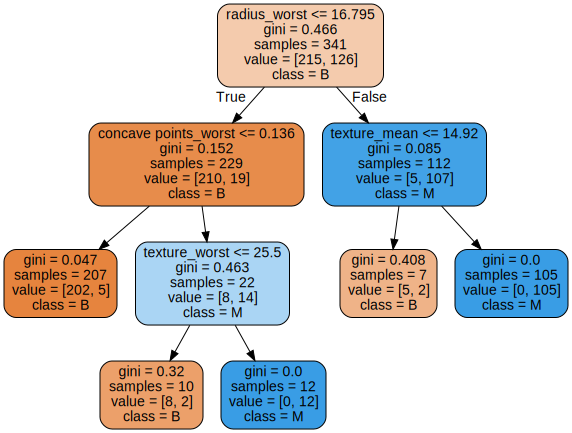

In [8]:
graph_p

# Bagging

In [9]:
n_nestmators_list = [10, 50, 100, 250, 500, 1000, 5000]
mean_cv_score_bagging = []
for i in n_nestmators_list:
    bagging = ske.BaggingClassifier(random_state=25,base_estimator = pruned_tree, n_estimators=i)
    b_scores = skm.cross_val_score(bagging, X, Y, scoring='accuracy', cv=6, n_jobs=-1)
    mean_cv_score_bagging.append(np.mean(b_scores))
bagging_best_score = mean_cv_score_bagging[np.argmax(mean_cv_score_bagging, axis=0)]
bagging_mean_score = np.mean(mean_cv_score_bagging)
best_number_of_base_estimators = n_nestmators_list[np.argmax(mean_cv_score_bagging, axis=0)]

In [14]:
best_number_of_base_estimators

500

In [10]:
bagging_b = ske.BaggingClassifier(random_state=25,base_estimator = pruned_tree, n_estimators=best_number_of_base_estimators)
bagging_b_fitted = bagging_b.fit(X_training, Y_training)
bagging_b_fitted.score(X_test,Y_test)

0.956140350877193

# Random Forest

In [1]:
mean_cv_score_rf = []
for depth in range(1,15):   
    rand_forest = ske.RandomForestClassifier(random_state=25, max_depth=depth)
    rf_scores = skm.cross_val_score(rand_forest, X, Y, cv=6)
    mean_cv_score_rf.append(np.mean(rf_scores))
rf_best_score = mean_cv_score_rf[np.argmax(mean_cv_score_rf, axis=0)]
rf_mean_score = np.mean(mean_cv_score_rf)
best_number_of_depth = np.argmax(mean_cv_score_rf, axis=0)+1

NameError: name 'ske' is not defined

In [15]:
best_number_of_depth 

6

In [12]:
rf_b = ske.RandomForestClassifier(random_state=25,max_depth=best_number_of_depth)
rf_b_fitted = rf_b.fit(X_training, Y_training)
rf_b_fitted.score(X_test,Y_test)

0.9692982456140351

# Boosting

In [13]:
mean_cv_score_boosting = []
for i in n_nestmators_list:
    boosting = ske.AdaBoostClassifier(random_state=25,base_estimator = pruned_tree, n_estimators=i)
    boo_scores = skm.cross_val_score(boosting, X, Y, scoring='accuracy', cv=6, n_jobs=-1)
    mean_cv_score_boosting.append(np.mean(boo_scores))
boosting_best_score = mean_cv_score_boosting[np.argmax(mean_cv_score_boosting, axis=0)]
boosting_mean_score = np.mean(mean_cv_score_boosting)
best_number_of_base_estimators_boo = n_nestmators_list[np.argmax(mean_cv_score_boosting, axis=0)]

In [17]:
best_number_of_base_estimators_boo

1000

In [16]:
boosting_b = ske.AdaBoostClassifier(random_state=25,base_estimator = pruned_tree, n_estimators=best_number_of_base_estimators_boo)
boosting_b_fitted = boosting_b.fit(X_training, Y_training)
boosting_b_fitted.score(X_test,Y_test)

0.9736842105263158